In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
data = fetch_20newsgroups()

In [6]:
len(data.data)

11314

In [7]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
categories = ['alt.atheism','comp.graphics','sci.med', 'soc.religion.christian', 'talk.politics.misc', 'misc.forsale']

In [9]:
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=4)

In [10]:
train_data.target_names

['alt.atheism',
 'comp.graphics',
 'misc.forsale',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.misc']

In [11]:
train_data.target

array([3, 5, 4, ..., 4, 3, 2], dtype=int64)

In [13]:
train_data.data[0]

"From: u96_averba@vaxc.stevens-tech.edu\nSubject: Arythmia\nLines: 11\nOrganization: Stevens Institute Of Technology\n\nI don't know if anyone knows about this topic: electrical heart \nfailure. One of my friends has had to go to the doctor because\nhe had chest pains. The Doc said it was Arythmia. So he had to\ngo to a new york hospital for a lot of money to get treated. His\ndoctors said that he could die from it, and the medication caused\ncancer ( that he was taking). Well, I suggested that he run, excersize\nand eat more, ( he is very skinny) but he says that has nothing\nto do with it. Does anyone know what causes arythmia and how \nit can be treated?\n\t\t\tThanks \n\n"

In [14]:
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=4)

#### Feature Extraction from Text

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vect = CountVectorizer(stop_words='english')

In [17]:
X_train_cv = count_vect.fit_transform(train_data.data)

In [18]:
X_train_cv.shape

(3307, 45074)

In [27]:
import numpy as np
np.where(X_train_cv[0].toarray()[0] != 0)

(array([  521,  7587, 10493, 10818, 10820, 11308, 15035, 15670, 15677,
        15680, 15708, 15761, 16319, 16457, 16610, 17617, 18031, 19153,
        21053, 21709, 23123, 24866, 24882, 25861, 26192, 27289, 28225,
        29212, 30398, 30864, 35996, 36168, 36388, 37744, 38915, 39272,
        39440, 40060, 40250, 40269, 40568, 41119, 41452, 41872, 42995, 44876], dtype=int64),)

In [29]:
count_vect.vocabulary_['money']

28225

In [30]:
X_train_cv[0].toarray()[0][28225]

1

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_cv)

In [33]:
X_train_tf = tf_transformer.transform(X_train_cv)

In [34]:
X_train_tf.shape

(3307, 45074)

In [37]:
X_train_tf[0].toarray()[0][28225]

0.12309149097933272

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
clf.fit(X_train_tf,train_data.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
new_text = ['I love god','Hope I stay in good health']

In [42]:
X_new_counts = count_vect.transform(new_text)

In [43]:
X_new_tf = tf_transformer.transform(X_new_counts)

In [44]:
clf.predict(X_new_tf)

array([4, 3], dtype=int64)

In [45]:
train_data.target_names

['alt.atheism',
 'comp.graphics',
 'misc.forsale',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.misc']

In [46]:
from sklearn.metrics import confusion_matrix

In [50]:
len(test_data.data)

2202

In [52]:
pred = clf.predict(X_train_tf)

In [55]:
mat = confusion_matrix(y_pred=pred, y_true=train_data.target)

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

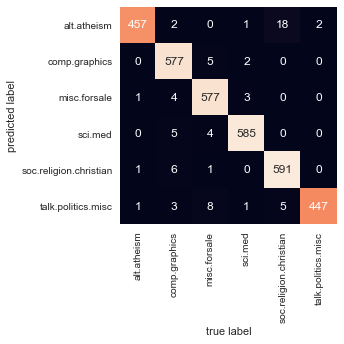

In [58]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');